In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("xhlulu/140k-real-and-fake-faces")

print("Path to dataset files:", path)

100%|██████████| 3.75G/3.75G [02:57<00:00, 22.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/xhlulu/140k-real-and-fake-faces/versions/2


In [2]:
import pandas as pd
import numpy as np
import os
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv(os.path.join(path, 'train.csv'))
test_df = pd.read_csv(os.path.join(path, 'test.csv'))
valid_df = pd.read_csv(os.path.join(path, 'valid.csv'))

print("Training data shape:", train_df.shape)
print("Testing data shape:", test_df.shape)
print("Validation data shape:", valid_df.shape)

Training data shape: (100000, 6)
Testing data shape: (20000, 6)
Validation data shape: (20000, 6)


In [4]:
train_real_df = train_df[train_df['label'] == 1].copy()
train_fake_df = train_df[train_df['label'] == 0].copy()

test_real_df = test_df[test_df['label'] == 1].copy()
test_fake_df = test_df[test_df['label'] == 0].copy()

valid_real_df = valid_df[valid_df['label'] == 1].copy()
valid_fake_df = valid_df[valid_df['label'] == 0].copy()

print("Training data shapes:")
print("  Real:", train_real_df.shape)
print("  Fake:", train_fake_df.shape)
print("\nTesting data shapes:")
print("  Real:", test_real_df.shape)
print("  Fake:", test_fake_df.shape)
print("\nValidation data shapes:")
print("  Real:", valid_real_df.shape)
print("  Fake:", valid_fake_df.shape)

Training data shapes:
  Real: (50000, 6)
  Fake: (50000, 6)

Testing data shapes:
  Real: (10000, 6)
  Fake: (10000, 6)

Validation data shapes:
  Real: (10000, 6)
  Fake: (10000, 6)


In [5]:
train_df4=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Face_Datasets/train_df4.csv")
valid_df4=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Face_Datasets/valid_df4.csv")

In [6]:
print(train_df4.shape)
print(valid_df4.shape)

(20000, 6)
(4000, 6)


In [7]:
valid_df4[34:42]

,Unnamed: 0,original_path,id,label,label_str,path
34,6017,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,04554,1,real,valid/real/04554.jpg
35,6017,/kaggle/input/1-million-fake-faces/1m_faces_00...,BKXWRNQ7KI,0,fake,valid/fake/BKXWRNQ7KI.jpg
36,6018,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,47067,1,real,valid/real/47067.jpg
37,6018,/kaggle/input/1-million-fake-faces/1m_faces_00...,VTHN783GK1,0,fake,valid/fake/VTHN783GK1.jpg
38,6019,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,54852,1,real,valid/real/54852.jpg
39,6019,/kaggle/input/1-million-fake-faces/1m_faces_00...,DBGXERMWJ2,0,fake,valid/fake/DBGXERMWJ2.jpg
40,6020,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,37684,1,real,valid/real/37684.jpg
41,6020,/kaggle/input/1-million-fake-faces/1m_faces_12...,4WZDFAYN89,0,fake,valid/fake/4WZDFAYN89.jpg


In [8]:
def merge_df(df1, df2):

  # Find the minimum length of the two dataframes
  min_len = min(len(df1), len(df2))

  merge_df={}
  for i in range(min_len):
    if i < len(df1):
      merge_df


  if len(df1) > len(df2):
    merged_df = pd.concat([merged_df, df1.iloc[min_len:]], ignore_index=True)
  elif len(df2) > len(df1):
    merged_df = pd.concat([merged_df, df2.iloc[min_len:]], ignore_index=True)

  return merged_df

In [9]:
def merge_df(df1, df2):

  # Find the minimum length of the two dataframes
  min_len = min(len(df1), len(df2))

  merged_list = []
  for i in range(min_len):
    merged_list.append(df1.iloc[i])
    merged_list.append(df2.iloc[i])

  merged_df = pd.DataFrame(merged_list)

  if len(df1) > len(df2):
    merged_df = pd.concat([merged_df, df1.iloc[min_len:]], ignore_index=True)
  elif len(df2) > len(df1):
    merged_df = pd.concat([merged_df, df2.iloc[min_len:]], ignore_index=True)

  return merged_df

In [10]:
merge_valid_df=merge_df(valid_real_df,valid_fake_df)
merge_valid_df.head()

,Unnamed: 0,original_path,id,label,label_str,path
0,0,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,20001,1,real,valid/real/20001.jpg
10000,0,/kaggle/input/1-million-fake-faces/1m_faces_12...,U5EXT9VRRT,0,fake,valid/fake/U5EXT9VRRT.jpg
1,1,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,11264,1,real,valid/real/11264.jpg
10001,1,/kaggle/input/1-million-fake-faces/1m_faces_12...,Z5HAG1AZUB,0,fake,valid/fake/Z5HAG1AZUB.jpg
2,2,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,19817,1,real,valid/real/19817.jpg


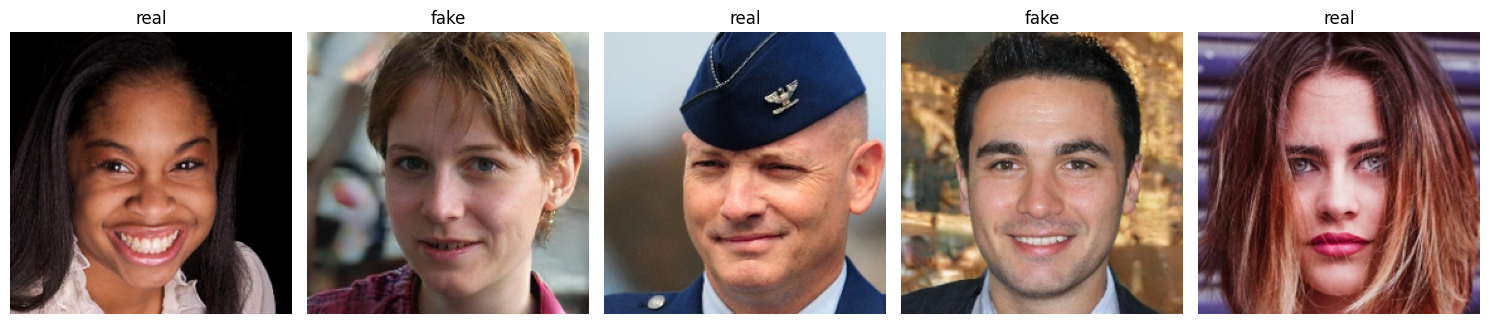

In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Get the base path of the dataset
dataset_path = path # This variable was defined when downloading the dataset

# Select a few rows from train_df1 to plot
sample_images_df = train_df4.head()

plt.figure(figsize=(15, 5))

# Define the correct base path for the images
image_base_path = os.path.join(dataset_path, 'real_vs_fake', 'real-vs-fake')

# Define the target size for resizing
target_size = (224, 224)

for index, row in sample_images_df.iterrows():
    image_relative_path = row['path']
    # Construct the full path by joining the image_base_path and the relative path from the dataframe
    image_full_path = os.path.join(image_base_path, image_relative_path)

    try:
        img = Image.open(image_full_path)
        # Resize the image
        img_resized = img.resize(target_size)
        plt.subplot(1, len(sample_images_df), index + 1)
        plt.imshow(img_resized)
        plt.title(row['label_str'])
        plt.axis('off')
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_full_path}")
    except Exception as e:
        print(f"Error loading or displaying image {image_full_path}: {e}")

plt.tight_layout()
plt.show()

In [12]:
!pip install tensorflow
import tensorflow as tf
import keras

In [13]:

print("Image Dimensions:")
for index, row in sample_images_df.iterrows():
    image_relative_path = row['path']
    # Construct the full path by joining the image_base_path and the relative path from the dataframe
    image_full_path = os.path.join(image_base_path, image_relative_path)

    try:
        img = Image.open(image_full_path)
        print(f"Image: {image_relative_path}, Dimensions: {img.size}")
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_full_path}")
    except Exception as e:
        print(f"Error loading image {image_full_path}: {e}")

Image Dimensions:
Image: train/real/00942.jpg, Dimensions: (256, 256)
Image: train/fake/8WWOH6S30W.jpg, Dimensions: (256, 256)
Image: train/real/42382.jpg, Dimensions: (256, 256)
Image: train/fake/YK0IOPS0J6.jpg, Dimensions: (256, 256)
Image: train/real/67723.jpg, Dimensions: (256, 256)


In [14]:
# Select a few rows from train_df1 to plot
sample_images_df = valid_df4.head()

plt.figure(figsize=(15, 5))
print("Image Dimensions:")
for index, row in sample_images_df.iterrows():
    image_relative_path = row['path']
    # Construct the full path by joining the image_base_path and the relative path from the dataframe
    image_full_path = os.path.join(image_base_path, image_relative_path)

    try:
        img = Image.open(image_full_path)
        print(f"Image: {image_relative_path}, Dimensions: {img.size}")
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_full_path}")
    except Exception as e:
        print(f"Error loading image {image_full_path}: {e}")

Image Dimensions:
Image: valid/real/68791.jpg, Dimensions: (256, 256)
Image: valid/fake/4UQCQY1VF4.jpg, Dimensions: (256, 256)
Image: valid/real/24285.jpg, Dimensions: (256, 256)
Image: valid/fake/2EIPYVSCZY.jpg, Dimensions: (256, 256)
Image: valid/real/62876.jpg, Dimensions: (256, 256)


<Figure size 1500x500 with 0 Axes>

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# Define the correct base path for the images
image_base_path = os.path.join(path, 'real_vs_fake', 'real-vs-fake')

# Create an ImageDataGenerator for training with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create an ImageDataGenerator for validation (only rescaling)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Create the training data generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df4,
    directory=image_base_path,
    x_col='path',
    y_col='label_str',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary' # Use 'binary' for binary classification
)

# Create the validation data generator
valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_df4,
    directory=image_base_path,
    x_col='path',
    y_col='label_str',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary' # Use 'binary' for binary classification
)

Found 20000 validated image filenames belonging to 2 classes.
Found 4000 validated image filenames belonging to 2 classes.


In [16]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

# Load the MobileNetV2 model pre-trained on ImageNet, excluding the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [17]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Add new layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x) # Added a new hidden layer
x = Dropout(0.3)(x) # Changed dropout rate
x = Dense(128, activation='relu')(x) # Existing hidden layer
x = Dropout(0.3)(x) # Changed dropout rate
predictions = Dense(1, activation='sigmoid')(x) # Sigmoid for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

In [18]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 18,347,585 (69.99 MB)

 Trainable params: 16,089,601 (61.38 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [19]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#You can now train the model using model.fit() and include the early_stopping callback:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15,  # Set a large number of epochs, early stopping will stop training
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=[early_stopping] # Include the early stopping callback
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 263s 393ms/step - accuracy: 0.6569 - loss: 0.6888 - val_accuracy: 0.7508 - val_loss: 0.5010
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 245s 378ms/step - accuracy: 0.7505 - loss: 0.5085 - val_accuracy: 0.7717 - val_loss: 0.4804
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 263s 381ms/step - accuracy: 0.7786 - loss: 0.4641 - val_accuracy: 0.8043 - val_loss: 0.4213
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 236s 378ms/step - accuracy: 0.8073 - loss: 0.4200 - val_accuracy: 0.8245 - val_loss: 0.4024
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 260s 375ms/step - accuracy: 0.8085 - loss: 0.4187 - val_accuracy: 0.8085 - val_loss: 0.4207
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 265s 380ms/step - accuracy: 0.8212 - loss: 0.3889 - val_accuracy: 0.8330 - val_loss: 0.3838
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 237s 379ms/step - accuracy: 0.8328 - loss: 0.3753 - val_accuracy: 0.8217 - val_loss: 0.4027
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 237s 380ms/step - accuracy: 0.8391 -

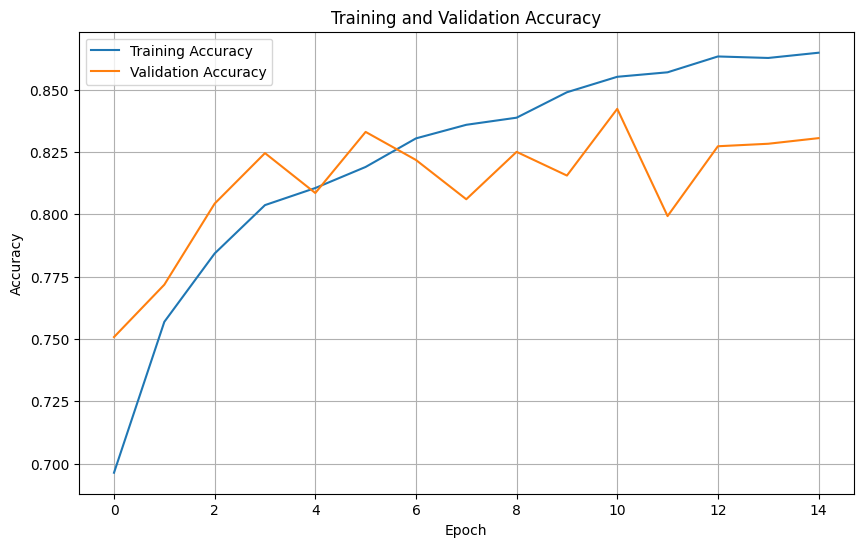

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Take a random sample of 20% from the dataframe
sampled_test_df = test_df.sample(frac=0.3, random_state=42) # Use a random_state for reproducibility

# Store the original labels separately for comparison
sampled_test_labels = sampled_test_df[['label', 'label_str']].copy()

# Remove the 'label' and 'label_str' columns from the sampled dataframe for prediction
sampled_test_df_for_prediction = sampled_test_df.drop(['label', 'label_str'], axis=1)

# Display the shape and head of the sampled dataframe for prediction and the labels dataframe
print("Shape of the sampled dataframe for prediction:", sampled_test_df_for_prediction.shape)
display(sampled_test_df_for_prediction.head())

print("\nShape of the sampled labels dataframe:", sampled_test_labels.shape)
display(sampled_test_labels.head())

Shape of the sampled dataframe for prediction: (6000, 4)


,Unnamed: 0,original_path,id,path
10650,650,/kaggle/input/1-million-fake-faces/1m_faces_04...,7BOPVP1032,test/fake/7BOPVP1032.jpg
2041,2041,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,44473,test/real/44473.jpg
8668,8668,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,55627,test/real/55627.jpg
1114,1114,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,12405,test/real/12405.jpg
13902,3902,/kaggle/input/1-million-fake-faces/1m_faces_08...,5SZ0A6GF38,test/fake/5SZ0A6GF38.jpg



Shape of the sampled labels dataframe: (6000, 2)


,label,label_str
10650,0,fake
2041,1,real
8668,1,real
1114,1,real
13902,0,fake


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size (using the same as training)
img_size = (224, 224)
batch_size = 32

# Define the correct base path for the images (same as used for training/validation)
image_base_path = os.path.join(path, 'real_vs_fake', 'real-vs-fake')

# Create an ImageDataGenerator for the sampled test data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_dataframe(
    dataframe=sampled_test_df,
    directory=image_base_path,
    x_col='path',
    y_col='label_str',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary', # Use 'binary' for binary classification
    shuffle=False # Do not shuffle test data to keep order for later comparison
)

# Evaluate the model on the test data
print("\nEvaluating the model on the sampled test data...")
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Found 6000 validated image filenames belonging to 2 classes.

Evaluating the model on the sampled test data...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


187/187 ━━━━━━━━━━━━━━━━━━━━ 18s 98ms/step - accuracy: 0.8348 - loss: 0.3736
Test Loss: 0.3646
Test Accuracy: 0.8369


188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step
Classification Report:
              precision    recall  f1-score   support

        fake       0.89      0.77      0.82      2983
        real       0.80      0.90      0.85      3017

    accuracy                           0.84      6000
   macro avg       0.84      0.84      0.84      6000
weighted avg       0.84      0.84      0.84      6000


Confusion Matrix:
[[2297  686]
 [ 293 2724]]


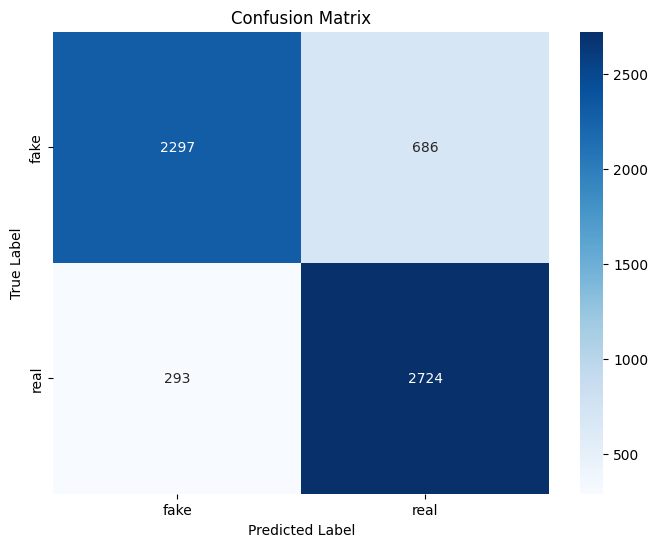

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get predictions from the test generator
# Reset the generator to ensure predictions are in the correct order
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)

# Convert predictions to binary classes (0 or 1)
predicted_classes = (predictions > 0.5).astype(int)

# Get the true labels from the test generator
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Save the model in the .keras format to the specified directory in Google Drive
model.save('/content/drive/MyDrive/Colab Notebooks/Face_Datasets/face_classification_model4.keras')
print("Model saved successfully to Google Drive as face_classification_model.keras")

Model saved successfully to Google Drive as face_classification_model.keras


In [25]:
model.save('face_classification_model4.keras')
print("Model saved successfully as face_classification_model.keras")

Model saved successfully as face_classification_model.keras


In [30]:
import pandas as pd
import os

# Define the path to the test_df1.csv file in your Google Drive
train_df1_path = '/content/drive/MyDrive/Colab Notebooks/Face_Datasets/train_df1.csv'

# Load the test_df1 dataframe
try:
    test_df1 = pd.read_csv(train_df1_path)
    print("test_df1 loaded successfully.")
    print("Shape of test_df1:", test_df1.shape)
    display(test_df1.head())
except FileNotFoundError:
    print(f"Error: {train_df1_path} not found. Please ensure the file exists in the specified Google Drive folder.")
except Exception as e:
    print(f"An error occurred while loading test_df1: {e}")

test_df1 loaded successfully.
Shape of test_df1: (20000, 6)


,Unnamed: 0,original_path,id,label,label_str,path
0,0,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,31355,1,real,train/real/31355.jpg
1,0,/kaggle/input/1-million-fake-faces/1m_faces_08...,FZV5C5L0AI,0,fake,train/fake/FZV5C5L0AI.jpg
2,1,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,02884,1,real,train/real/02884.jpg
3,1,/kaggle/input/1-million-fake-faces/1m_faces_08...,5NPAK781S4,0,fake,train/fake/5NPAK781S4.jpg
4,2,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,33988,1,real,train/real/33988.jpg


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size (using the same as training)
img_size = (224, 224)
batch_size = 32

# Define the correct base path for the images (same as used for training/validation)
# Assuming the images are located within the downloaded dataset structure
image_base_path = os.path.join(path, 'real_vs_fake', 'real-vs-fake')

# Create an ImageDataGenerator for test data (only rescaling)
test_df1_datagen = ImageDataGenerator(rescale=1./255)

# Create the test data generator from test_df1
test_df1_generator = test_df1_datagen.flow_from_dataframe(
    dataframe=test_df1,
    directory=image_base_path,
    x_col='path',
    y_col='label_str',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary', # Use 'binary' for binary classification
    shuffle=False # Do not shuffle test data to keep order for later comparison
)

Found 20000 validated image filenames belonging to 2 classes.


In [33]:
from tensorflow.keras.models import load_model

# Define the path to the saved model in your Google Drive
model_path = '/content/drive/MyDrive/Colab Notebooks/Face_Datasets/face_classification_model4.keras' # Using model4 as saved in the notebook state

# Load the saved model
try:
    loaded_model = load_model(model_path)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading the model: {e}")

Model loaded successfully.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


626/626 ━━━━━━━━━━━━━━━━━━━━ 58s 89ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


Classification Report on test_df1:
              precision    recall  f1-score   support

        fake       0.88      0.77      0.82     10000
        real       0.80      0.90      0.84     10000

    accuracy                           0.83     20000
   macro avg       0.84      0.83      0.83     20000
weighted avg       0.84      0.83      0.83     20000


Confusion Matrix on test_df1:
[[7710 2290]
 [1016 8984]]


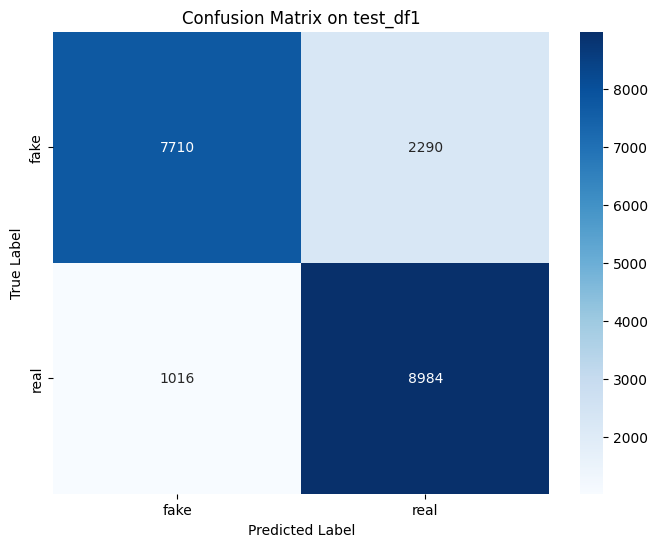

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions from the test_df1 generator
# Reset the generator to ensure predictions are in the correct order
test_df1_generator.reset()
predictions = loaded_model.predict(test_df1_generator, steps=test_df1_generator.samples // test_df1_generator.batch_size + 1)

# Convert predictions to binary classes (0 or 1)
predicted_classes = (predictions > 0.5).astype(int)

# Get the true labels from the test_df1 generator
true_classes = test_df1_generator.classes
class_labels = list(test_df1_generator.class_indices.keys())

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report on test_df1:")
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("\nConfusion Matrix on test_df1:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on test_df1')
plt.show()